In [58]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)
# decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist
import numpy as np
(x_train_im, _), (x_test_im, _) = mnist.load_data()
x_train = x_train_im.astype('float32') / 255.
x_test = x_test_im.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                )
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3453 - acc: 0.7520 - val_loss: 0.2674 - val_acc: 0.7957
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2605 - acc: 0.7952 - val_loss: 0.2494 - val_acc: 0.7926
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2370 - acc: 0.7937 - val_loss: 0.2219 - val_acc: 0.7923
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2128 - acc: 0.7948 - val_loss: 0.2026 - val_acc: 0.7947
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.1980 - acc: 0.7967 - val_loss: 0.1911 - val_acc: 0.7974


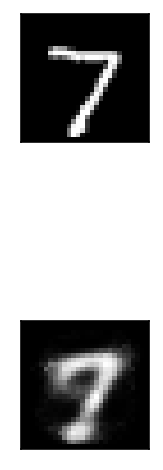

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,4))
ax = plt.subplot(3, 20, 1)
plt.imshow(x_test_im[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(3, 20, 2*20 + 1)
plt.imshow(decoded_imgs[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

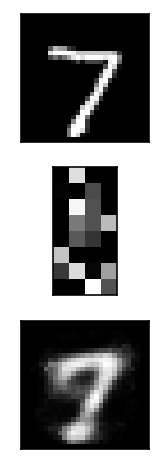

In [60]:

plt.figure(figsize=(40, 4))

# display original images
ax = plt.subplot(3, 20, 1)
plt.imshow(x_test_im[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display encoded images
ax = plt.subplot(3, 20, 1 + 20)
plt.imshow(encoded_imgs[0].reshape(8,4))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display reconstructed images
ax = plt.subplot(3, 20, 2*20 + 1)
plt.imshow(decoded_imgs[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
  
    
plt.show()



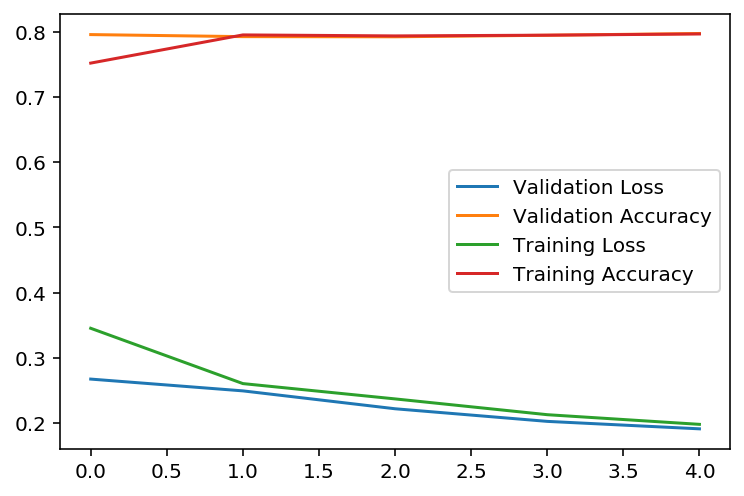

In [61]:
metrics = history.history
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.plot(metrics['val_acc'], label="Validation Accuracy")
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['acc'], label="Training Accuracy")
plt.legend()
plt.show()